# Import Packages and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


#Mounting Google Drive in Google Colab
The dataset is uploaded in google drive to ensure data is kept persistent.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading Fake and Real News Datasets from Google Drive

In [ ]:

column_names = ["title", "text", "subject", "date"]
fake = pd.read_csv('/content/drive/MyDrive/capstone_dataset/Fake.csv', header=None, names=column_names, skiprows=1)
real = pd.read_csv('/content/drive/MyDrive/capstone_dataset/True.csv', header=None, names=column_names, skiprows=1)



# Initial Exploration

In [ ]:
fake.head()

,title,text,subject,date
0,You Really Don’t Want To Miss Ana Navarro PUM...,When it comes to Donald Trump and his number o...,News,"August 17, 2016"
1,Trump Supporter: There Will Be Civil War Whet...,It s getting to the point that as frightening ...,News,"August 17, 2016"
2,Donald Trump’s Son Bashes His Father’s Campai...,If you ve never had to suffer through any of T...,News,"August 17, 2016"
3,WATCH: Trump Surrogate Omarosa Says Detractor...,This sounds exactly like what a dictator would...,News,"August 17, 2016"
4,SHOCKING: Glenn Beck Gives PERFECT Explanatio...,"When you think of civil rights activists, it s...",News,"August 17, 2016"


The number of rows in fake and real are approximately equal, and so we can say that the dataset is balanced.

In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18471 entries, 0 to 18470
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    18471 non-null  object
 1   text     18471 non-null  object
 2   subject  18471 non-null  object
 3   date     18471 non-null  object
dtypes: object(4)
memory usage: 577.3+ KB


In [ ]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915 entries, 0 to 14914
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    14915 non-null  object
 1   text     14915 non-null  object
 2   subject  14915 non-null  object
 3   date     14915 non-null  object
dtypes: object(4)
memory usage: 466.2+ KB


*Output* Variable 'category' is added to both the dataframes

In [ ]:
real['category'] = 1
fake['category'] = 0

*The two dataframes are concatenated.*

In [ ]:
combined_df = pd.DataFrame(pd.concat([real,fake]))

In [ ]:
combined_df.head()

,title,text,subject,date,category
0,Massachusetts sheriff offers prison inmates to...,BOSTON (Reuters) - A Massachusetts county sher...,politicsNews,"January 5, 2017",1
1,Reports that Trump eyeing revamp of spy agenci...,NEW YORK (Reuters) - Donald Trump’s spokesman ...,politicsNews,"January 5, 2017",1
2,Ryan says expects legislation to replace Obama...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"January 5, 2017",1
3,U.S. intelligence chief says Russia involvemen...,WASHINGTON (Reuters) - U.S. Director of Nation...,politicsNews,"January 5, 2017",1
4,U.S. intelligence chiefs call Russia 'major' c...,WASHINGTON (Reuters) - Russia is a major threa...,politicsNews,"January 5, 2017",1


In [ ]:
combined_df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
combined_df.subject.value_counts()

worldnews          10145
politics            6841
politicsNews        4770
left-news           4459
News                4040
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

#Visualizations

Visualizing Distribution of Fake and Real News using a Pie Chart

In [ ]:
import plotly.express as px

labels = ["Fake", "Real"]
values = combined_df["category"].value_counts().values
fig_pie = px.pie(values=values, names=labels, title="Distribution of Fake and Real News")
fig_pie.show()


Assigning colors based on category

In [ ]:
combined_df['color'] = combined_df['category'].map({0: 'salmon ', 1: 'lightblue'})


Timeline Visualization - Fake and Real News Articles Over Time

<Figure size 1500x600 with 0 Axes>

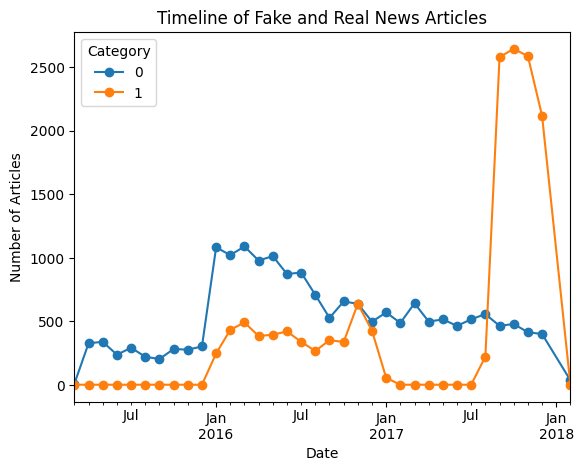

In [ ]:
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')

# Dropping rows where date conversion failed (if any)
combined_df = combined_df.dropna(subset=['date'])

# Grouping by date (by month here) and category, and counting the number of articles
timeline_data = combined_df.groupby([combined_df['date'].dt.to_period('M'), 'category']).size().unstack().fillna(0)

# Creating a line plot
plt.figure(figsize=(15, 6))
timeline_data.plot(kind='line', marker='o')
plt.title('Timeline of Fake and Real News Articles')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(title='Category')
plt.show()

Interactive Histogram: Analyzing the Distribution of Article Lengths by Category


In [ ]:
fig_histogram = px.histogram(combined_df, x='text_length', color='category',
                             color_discrete_map={0: 'lightsalmon', 1: 'lightblue'},
                             marginal='box', # Displays a box plot for additional insight
                             title='Distribution of Article Lengths by Category')

fig_histogram.show()


Text Preprocessing and Initial Exploration for Fake News Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import string

fake_text = " ".join(article for article in fake["text"])

def preprocess_text(text):

    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.translate(str.maketrans("", "", string.digits))
    return text

fake_text_cleaned = preprocess_text(fake_text)

fake_text_cleaned[:500]


'when it comes to donald trump and his number of apologists sent out to every media outlet to justify his horrific behavior the media has been less than extraordinary at calling out their utter bullshthowever leave it to ana navarro notably a conservative to absolutely rip trump s number one apologist apart during a recent segment on cnnformer trump campaign manager corey lewandowski is now a regular commentator on cnn  remember that the next time trump wants to say the media has a liberal bias l'

Word Cloud Visualization for Fake News Articles

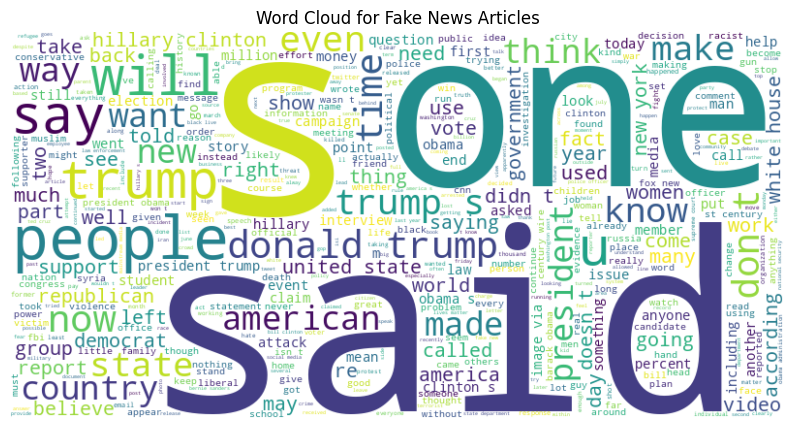

In [ ]:
wordcloud_fake = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=500, width=800, height=400).generate(fake_text_cleaned)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Fake News Articles")
plt.show()


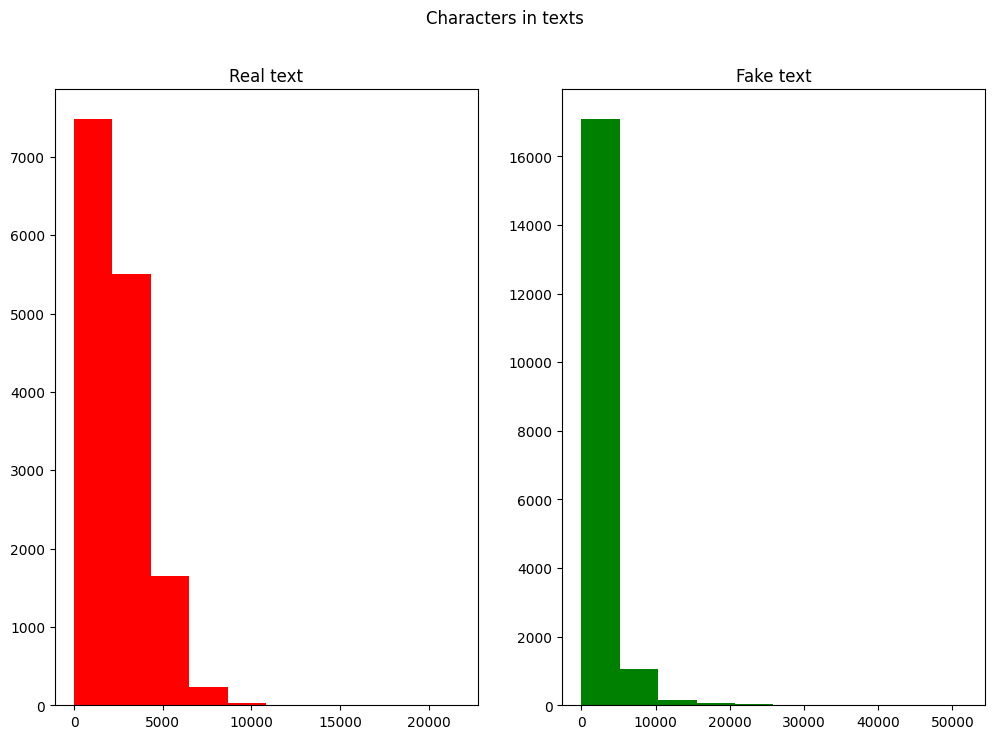

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=combined_df[combined_df['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Real text')
text_len=combined_df[combined_df['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

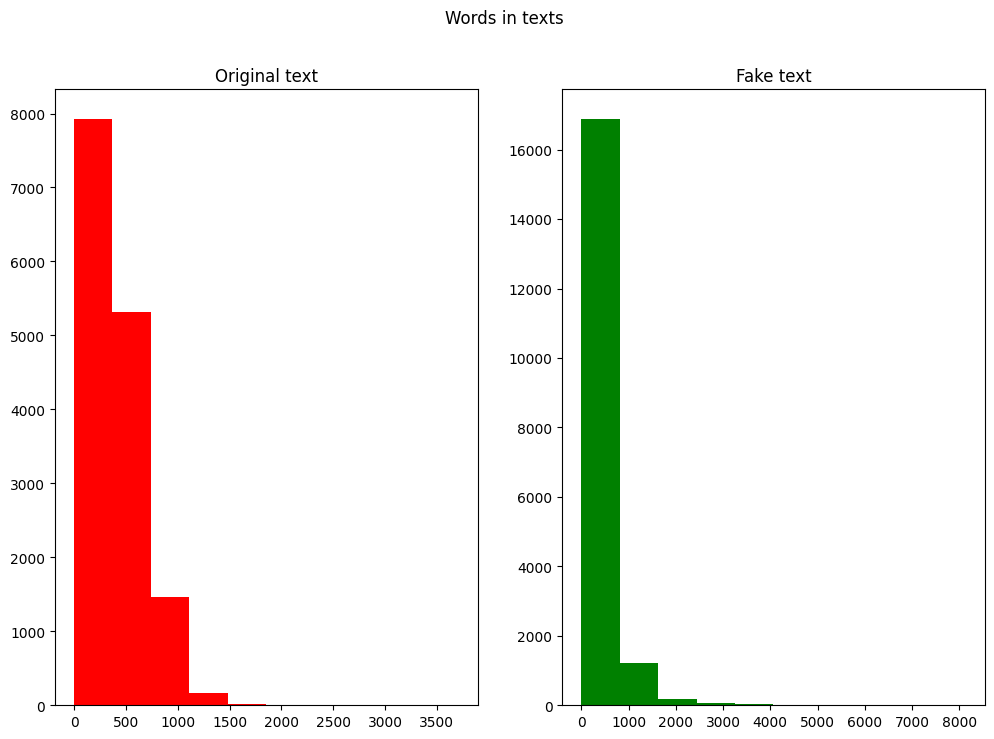

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=combined_df[combined_df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=combined_df[combined_df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-23-efa34ff4d1a7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-23-efa34ff4d1a7>:6: UserWarning:



`distplot` is a deprecated function and will be

Text(0.5, 0.98, 'Average word length in each text')

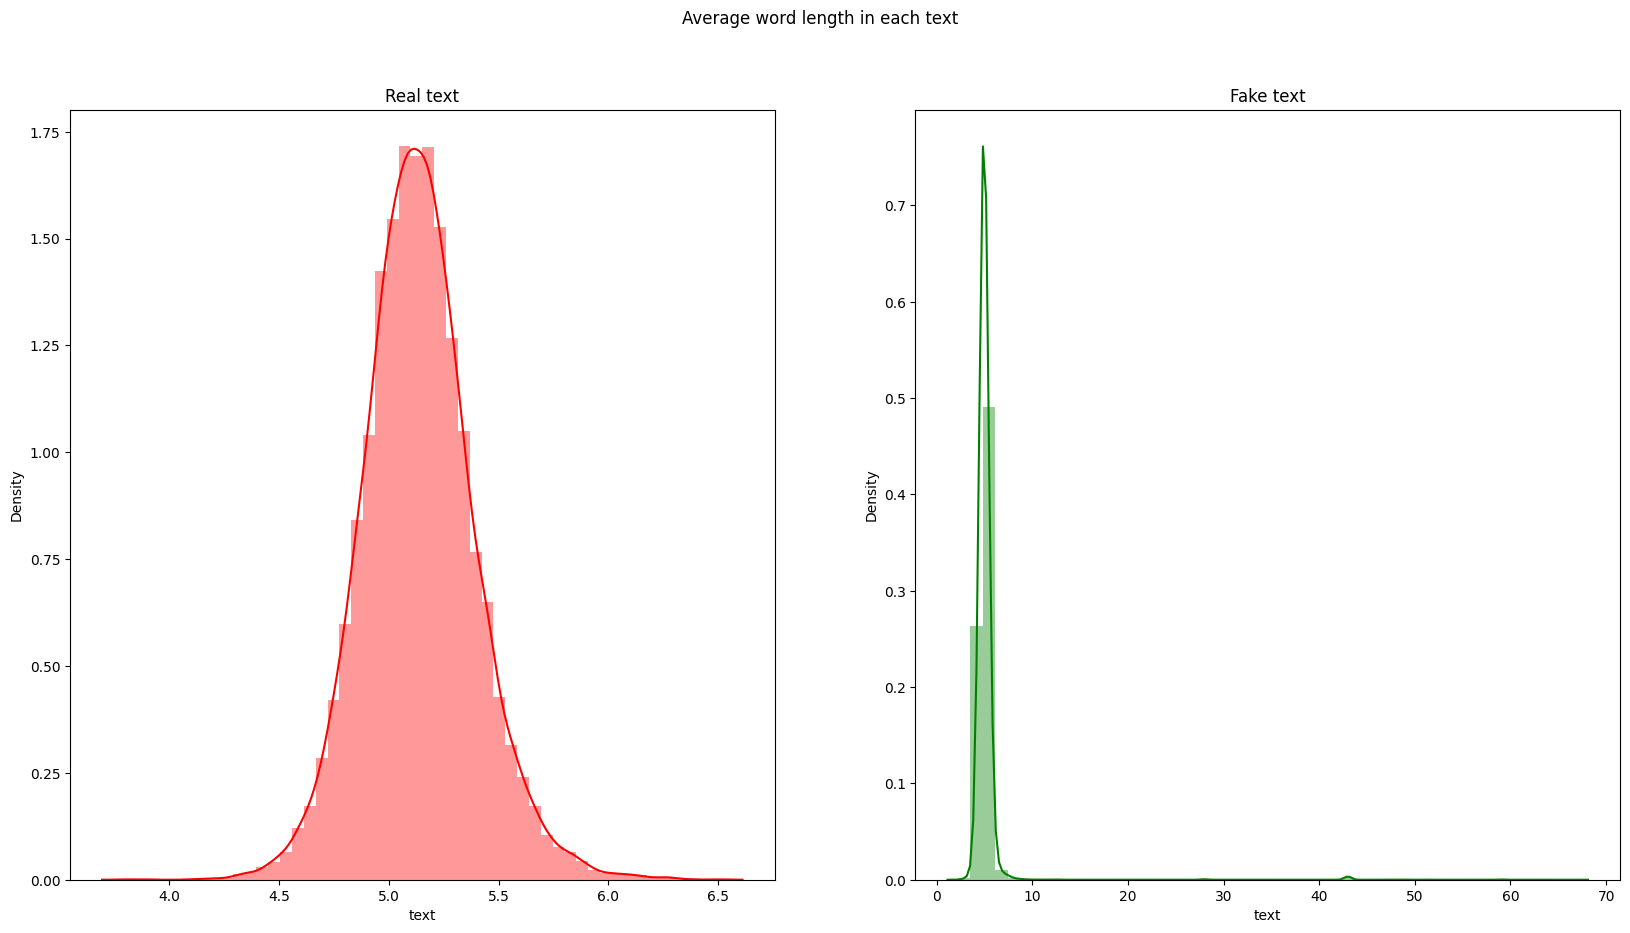

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=combined_df[combined_df['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Real text')
word=combined_df[combined_df['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

#N-Gram Analysis

###**Bi-Gram**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def get_top_ngrams(corpus, ngram_range, top_n):
    """
    Returns the top 'n' n-grams from a corpus of text.
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

# Get top 10 bi-grams from fake news titles
fake_news_bigrams = get_top_ngrams(fake['title'], (2, 2), 10)

# Get top 10 bi-grams from true news titles
true_news_bigrams = get_top_ngrams(real['title'], (2, 2), 10)

bigrams_df = pd.DataFrame({
    'Fake News Bi-Grams': [f"{bigram[0]} ({bigram[1]})" for bigram in fake_news_bigrams],
    'True News Bi-Grams': [f"{bigram[0]} ({bigram[1]})" for bigram in true_news_bigrams]
})

bigrams_df


,Fake News Bi-Grams,True News Bi-Grams
0,donald trump (588),north korea (553)
1,president trump (484),white house (348)
2,hillary clinton (371),islamic state (237)
3,trump video (253),supreme court (152)
4,anti trump (249),trump says (142)
5,bernie sanders (240),south korea (137)
6,white house (225),puerto rico (132)
7,ted cruz (215),saudi arabia (88)
8,fox news (212),north korean (88)
9,boiler room (205),nuclear deal (87)


**Insights:**




*   Donald Trump is a common topic in both fake and true news titles, but the context or surrounding words differ.
*  White House is a prevalent bi-gram in both categories, indicating that many articles (whether fake or true) focus on events or happenings related to the White House.
*   Some terms like Fox News, Hillary Clinton, and Bernie Sanders are more frequent in fake news titles.
*   In true news titles, there's a broader range of topics covered, such as North Korea, Islamic State, Supreme Court, and Puerto Rico.








###**Tri-Gram**

In [ ]:
fake_news_trigrams = get_top_ngrams(fake['title'], (3, 3), 10)
true_news_trigrams = get_top_ngrams(real['title'], (3, 3), 10)

trigrams_df = pd.DataFrame({
    'Fake News Tri-Grams': [f"{trigram[0]} ({trigram[1]})" for trigram in fake_news_trigrams],
    'True News Tri-Grams': [f"{trigram[0]} ({trigram[1]})" for trigram in true_news_trigrams]
})

trigrams_df

,Fake News Tri-Grams,True News Tri-Grams
0,black lives matter (159),iran nuclear deal (56)
1,boiler room ep (138),house speaker ryan (47)
2,supreme court justice (46),reuters ipsos poll (42)
3,donald trump video (42),south china sea (36)
4,donald trump jr (38),deir al zor (34)
5,anti trump protesters (34),puerto rico debt (32)
6,fox news host (32),says north korea (30)
7,new york times (32),north korea nuclear (29)
8,patrick henningsen live (30),white house says (29)
9,president trump video (26),north korea sanctions (27)


**Insights:**

*  "pic twitter com": This tri-gram frequently occurs in the fake news dataset. It
suggests that many fake news articles might include Twitter image links.
* "21st century wire" and "news 21st century": These phrases suggest that there might be recurring sources or mentions in the fake news dataset.
* "black lives matter": This topic seems to be prevalent in the fake news dataset.
* Common Phrases: Phrases like "president donald trump" and "president barack obama" are common in both datasets. However, their contexts might differ.
*In the true news dataset, there are mentions of specific sources like "reuters president donald" and "new york reuters", which might indicate the origin or reference of the news